In [35]:
### Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [36]:
from scipy.stats.distributions import alpha
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext, sepa):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, sep=sepa)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

### Función para datos
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

### Cambia de texto a numerico
def cambioTextNum(df, nomCol, tipo):
    df[nomCol] = df[nomCol].astype(tipo)
    return df[nomCol]

### Revisa datos categoricos
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

### Cambia de texto a binario
def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

### Convierte los valores dumies
def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

### Multi graficas
def multigraf(df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

### Multi graficas para tres variables
def multigrafTres(df, coluno, coldos, coltres):
    h = sns.FacetGrid(df, col=coluno, height=4, aspect=.5)
    h.map(sns.barplot, coldos, coltres, order=['M', 'F'])
    return h

def barras(df, colx, coly, cruce):
    sns.catplot(x=colx, y=coly, hue=cruce, kind='bar', data=df)

def dispersion (df, cruce, num, numdos):
    g = sns.FacetGrid(df, hue=cruce, palette='flare', height=5)
    g.map(sns.scatterplot, num, numdos, s=100, alpha=0.5)
    g.add_legend()
    return g

### Diagrama de correlación
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno, tamdos))   
    sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [37]:
### Cargue de la data
notasEstudiantes = importDatos('./Datasets/', 'student-mat', '.csv', ';')

notasEstudiantes.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [38]:
notasEstudiantes.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [39]:
### Se muestran los tipos de datos de la data
datos_NAN(notasEstudiantes)

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school     object           2          0
                                     sex     object           2          0
                                     age      int64           8          0
                                 address     object           2          0
                                 famsize     object           2          0
                                 Pstatus     object           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

In [40]:
### Se asigna a datosNotas para trabajar sobre el mismo
datosNotas = notasEstudiantes

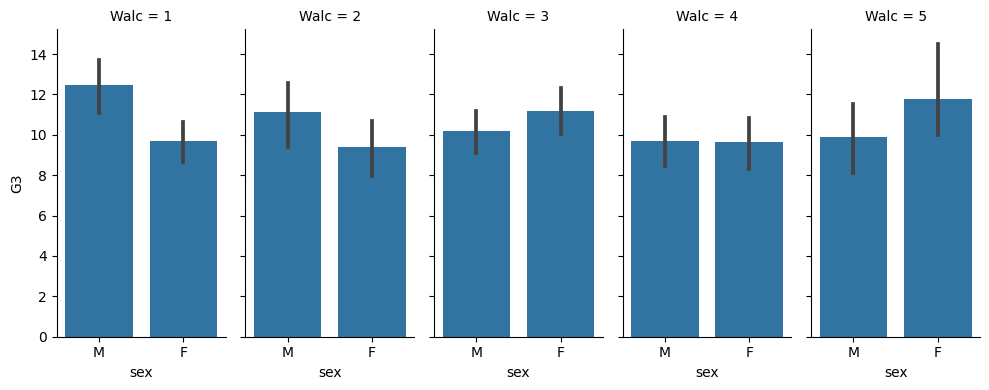

In [41]:
multigrafTres(notasEstudiantes, 'Walc', 'sex', 'G3')

In [42]:
### Se realiza el cambio de Mjob a tipo numerico
datosNotas['Medu'] = cambioTextNum(datosNotas, 'Medu','int64')

datos_NAN(datosNotas)

Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school     object           2          0
                                     sex     object           2          0
                                     age      int64           8          0
                                 address     object           2          0
                                 famsize     object           2          0
                                 Pstatus     object           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

In [43]:
### Revisión datos
revCategoricos(datosNotas, 'romantic')

### Cambio de valores a binario
datosNotas['school'] = camTextBi(datosNotas, 'school', 'GP', 0, 1)
datosNotas['sex'] = camTextBi(datosNotas, 'sex', 'F', 0, 1)
datosNotas['address'] = camTextBi(datosNotas, 'address', 'U', 0, 1)
datosNotas['famsize'] = camTextBi(datosNotas, 'famsize', 'GT3', 0, 1)
datosNotas['Pstatus'] = camTextBi(datosNotas, 'Pstatus', 'T', 0, 1)
datosNotas['schoolsup'] = camTextBi(datosNotas, 'schoolsup', 'no', 0, 1)
datosNotas['famsup'] = camTextBi(datosNotas, 'famsup', 'no', 0, 1)
datosNotas['paid'] = camTextBi(datosNotas, 'paid', 'no', 0, 1)
datosNotas['activities'] = camTextBi(datosNotas, 'activities', 'no', 0, 1)
datosNotas['nursery'] = camTextBi(datosNotas, 'nursery', 'no', 0, 1)
datosNotas['higher'] = camTextBi(datosNotas, 'higher', 'no', 0, 1)
datosNotas['internet'] = camTextBi(datosNotas, 'internet', 'no', 0, 1)
datosNotas['romantic'] = camTextBi(datosNotas, 'romantic', 'no', 0, 1)

datos_NAN(datosNotas)


Dimesiones: 395 filas, 33 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school      int64           2          0
                                     sex      int64           2          0
                                     age      int64           8          0
                                 address      int64           2          0
                                 famsize      int64           2          0
                                 Pstatus      int64           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                                    Mjob     object           5          0
                                    Fjob     object           5          0
                                  reason     object           4          0
                                gua

In [44]:
#from sklearn import preprocessing
#label_e = preprocessing.LabelEncoder()
#datosNotas['Mjob'] = label_e.fit_transform(datosNotas['Mjob'])
#datosNotas['Fjob'] = label_e.fit_transform(datosNotas['Fjob'])
#datosNotas['reason'] = label_e.fit_transform(datosNotas['reason'])
#datosNotas['guardian'] = label_e.fit_transform(datosNotas['guardian'])

### Revisión de datos
revCategoricos(datosNotas, 'Mjob')

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [45]:
### Conversión de varibles dumies
dataFinal = convDummies(datosNotas,'Mjob')
dataFinal2 = convDummies(dataFinal,'Fjob')
dataFinal3 = convDummies(dataFinal2,'reason')
dataFinal = convDummies(dataFinal3,'guardian')
datos_NAN(dataFinal)

Dimesiones: 395 filas, 46 columnas
Total de Valores NAN: 0
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                  school      int64           2          0
                                     sex      int64           2          0
                                     age      int64           8          0
                                 address      int64           2          0
                                 famsize      int64           2          0
                                 Pstatus      int64           2          0
                                    Medu      int64           5          0
                                    Fedu      int64           5          0
                              traveltime      int64           4          0
                               studytime      int64           4          0
                                failures      int64           4          0
                               scho

In [46]:
### Se eliminan columnas
###dataFinal = dataFinal.drop(columns=['health', 'other', 'services', 'teacher', 'at_home', 'course', 'reputation', 'nursery', 'higher', 'famsize', 'Pstatus', 'schoolsup', 'famrel', 'paid', 'romantic', 'studytime', 'address', 'Medu', 'Fedu', 'traveltime', 'failures', 'famsup', 'activities', 'goout', 'Dalc', 'Walc', 'absences', 'father', 'mother'])
dataFinal = dataFinal.drop(columns=['health', 'other', 'services', 'teacher', 'at_home', 'course', 'reputation', 'nursery', 'higher', 'famsize', 'Pstatus', 'schoolsup', 'famrel', 'paid'])

In [47]:
### Test de normalidad de Shapiro-wilk
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(dataFinal)

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable Normal
1,sex,4.010956e-28,No es una variable Normal
2,age,1.587842e-14,No es una variable Normal
3,address,1.640359e-31,No es una variable Normal
4,Medu,2.815386e-18,No es una variable Normal
5,Fedu,2.706857e-17,No es una variable Normal
6,traveltime,2.310120e-27,No es una variable Normal
7,studytime,6.547986e-20,No es una variable Normal
8,failures,1.138359e-31,No es una variable Normal
9,famsup,1.150231e-28,No es una variable Normal


In [48]:
### Test de normalidad de D'agsotino - Asimetría y curtosis
from scipy.stats import normaltest
def Dagostino(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable normal')
        else:
            concepto.append('Es una variable normal')
    dfShapiro = pd.DataFrame({'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

Dagostino(dataFinal)

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable normal
1,sex,4.010956e-28,No es una variable normal
2,age,1.587842e-14,No es una variable normal
3,address,1.640359e-31,No es una variable normal
4,Medu,2.815386e-18,No es una variable normal
5,Fedu,2.706857e-17,No es una variable normal
6,traveltime,2.310120e-27,No es una variable normal
7,studytime,6.547986e-20,No es una variable normal
8,failures,1.138359e-31,No es una variable normal
9,famsup,1.150231e-28,No es una variable normal


In [49]:
### Normalización de la data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

### Función para estandarizar -1 a 1
def stanData(df):
    scaler = StandardScaler()
    dataStan = scaler.fit_transform(df)
    df_stan = pd.DataFrame(dataStan, columns=df.columns)
    return df_stan

dataNormalizada = normaData(dataFinal)
dataNormalizada.describe().T

stanData(dataNormalizada)

,school,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famsup,...,goout,Dalc,Walc,absences,G1,G2,G3,home,father,mother
0,-0.363050,-0.948176,1.023046,-0.535392,1.143856,1.360371,0.792251,-0.042286,-0.449944,-1.257656,...,0.801479,-0.540699,-1.003789,0.036424,-1.782467,-1.254791,-0.964934,-0.617348,-0.543214,0.668496
1,-0.363050,-0.948176,0.238380,-0.535392,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,0.795130,...,-0.097908,-0.540699,-1.003789,-0.213796,-1.782467,-1.520979,-0.964934,-0.617348,1.840894,-1.495896
2,-0.363050,-0.948176,-1.330954,-0.535392,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,-1.257656,...,-0.997295,0.583385,0.551100,0.536865,-1.179147,-0.722415,-0.090739,-0.617348,-0.543214,0.668496
3,-0.363050,-0.948176,-1.330954,-0.535392,1.143856,-0.479857,-0.643249,1.150779,-0.449944,0.795130,...,-0.997295,-0.540699,-1.003789,-0.464016,1.234133,0.874715,1.002004,1.619831,-0.543214,0.668496
4,-0.363050,-0.948176,-0.546287,-0.535392,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.795130,...,-0.997295,-0.540699,-0.226345,-0.213796,-1.480807,-0.190038,-0.090739,1.619831,1.840894,-1.495896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,-0.535392,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,0.795130,...,0.801479,2.831553,2.105989,0.661975,-0.575827,-0.456226,-0.309288,-0.617348,-0.543214,-1.495896
391,2.754443,1.054656,0.238380,-0.535392,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-1.257656,...,1.700867,1.707469,1.328545,-0.338906,0.932473,1.407091,1.220553,-0.617348,-0.543214,0.668496
392,2.754443,1.054656,3.377047,1.867789,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,-1.257656,...,-0.097908,1.707469,0.551100,-0.338906,-0.274167,-0.722415,-0.746385,-0.617348,-0.543214,-1.495896
393,2.754443,1.054656,1.023046,1.867789,0.229234,-0.479857,2.227751,-1.235351,-0.449944,-1.257656,...,-1.896683,1.707469,1.328545,-0.714236,0.027493,0.342338,-0.090739,-0.617348,-0.543214,0.668496


In [50]:
### Se aplica de nuevo el test de Shapiro
testShapiroWilk(dataNormalizada)

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable Normal
1,sex,4.010956e-28,No es una variable Normal
2,age,1.587842e-14,No es una variable Normal
3,address,1.640359e-31,No es una variable Normal
4,Medu,2.815386e-18,No es una variable Normal
5,Fedu,2.706857e-17,No es una variable Normal
6,traveltime,2.310120e-27,No es una variable Normal
7,studytime,6.547986e-20,No es una variable Normal
8,failures,1.138359e-31,No es una variable Normal
9,famsup,1.150231e-28,No es una variable Normal


In [51]:
### Se aplica de nuevo el test de D'agostino
Dagostino(dataNormalizada)

,Variable,Valores P,Concepto
0,school,1.151195e-34,No es una variable normal
1,sex,4.010956e-28,No es una variable normal
2,age,1.587842e-14,No es una variable normal
3,address,1.640359e-31,No es una variable normal
4,Medu,2.815386e-18,No es una variable normal
5,Fedu,2.706857e-17,No es una variable normal
6,traveltime,2.310120e-27,No es una variable normal
7,studytime,6.547986e-20,No es una variable normal
8,failures,1.138359e-31,No es una variable normal
9,famsup,1.150231e-28,No es una variable normal


In [52]:
dataNormalizada.head()

,school,sex,age,address,Medu,Fedu,traveltime,studytime,failures,famsup,...,goout,Dalc,Walc,absences,G1,G2,G3,home,father,mother
0,0.0,0.0,0.428571,0.0,1.00,1.00,0.333333,0.333333,0.0,0.0,...,0.75,0.00,0.00,0.080000,0.1250,0.315789,0.30,0.0,0.0,1.0
1,0.0,0.0,0.285714,0.0,0.25,0.25,0.000000,0.333333,0.0,1.0,...,0.50,0.00,0.00,0.053333,0.1250,0.263158,0.30,0.0,1.0,0.0
2,0.0,0.0,0.000000,0.0,0.25,0.25,0.000000,0.333333,1.0,0.0,...,0.25,0.25,0.50,0.133333,0.2500,0.421053,0.50,0.0,0.0,1.0
3,0.0,0.0,0.000000,0.0,1.00,0.50,0.000000,0.666667,0.0,1.0,...,0.25,0.00,0.00,0.026667,0.7500,0.736842,0.75,1.0,0.0,1.0
4,0.0,0.0,0.142857,0.0,0.75,0.75,0.000000,0.333333,0.0,1.0,...,0.25,0.00,0.25,0.053333,0.1875,0.526316,0.50,1.0,1.0,0.0


In [53]:
### Función para revisar la correlación aplicando spearman
def tidy_corr(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Variable_1', 'Variable_2', 'R']
    corr_mat = corr_mat.loc[corr_mat['Variable_1']!= corr_mat['Variable_2'],:]
    corr_mat['abs_r'] = np.abs(corr_mat['R'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

corr_matrix = dataNormalizada.corr(method='spearman')

tidy_corr(corr_matrix)
### Se evidencia las variables con mayor correlación son G3, G2 y G1 para temas predictivos

,Variable_1,Variable_2,R,abs_r
476,G2,G3,0.957125,0.957125
499,G3,G2,0.957125,0.957125
474,G2,G1,0.894792,0.894792
451,G1,G2,0.894792,0.894792
452,G1,G3,0.878001,0.878001
...,...,...,...,...
61,age,freetime,0.000302,0.000302
14,school,goout,0.000251,0.000251
336,goout,school,0.000251,0.000251
568,mother,Walc,-0.000075,0.000075


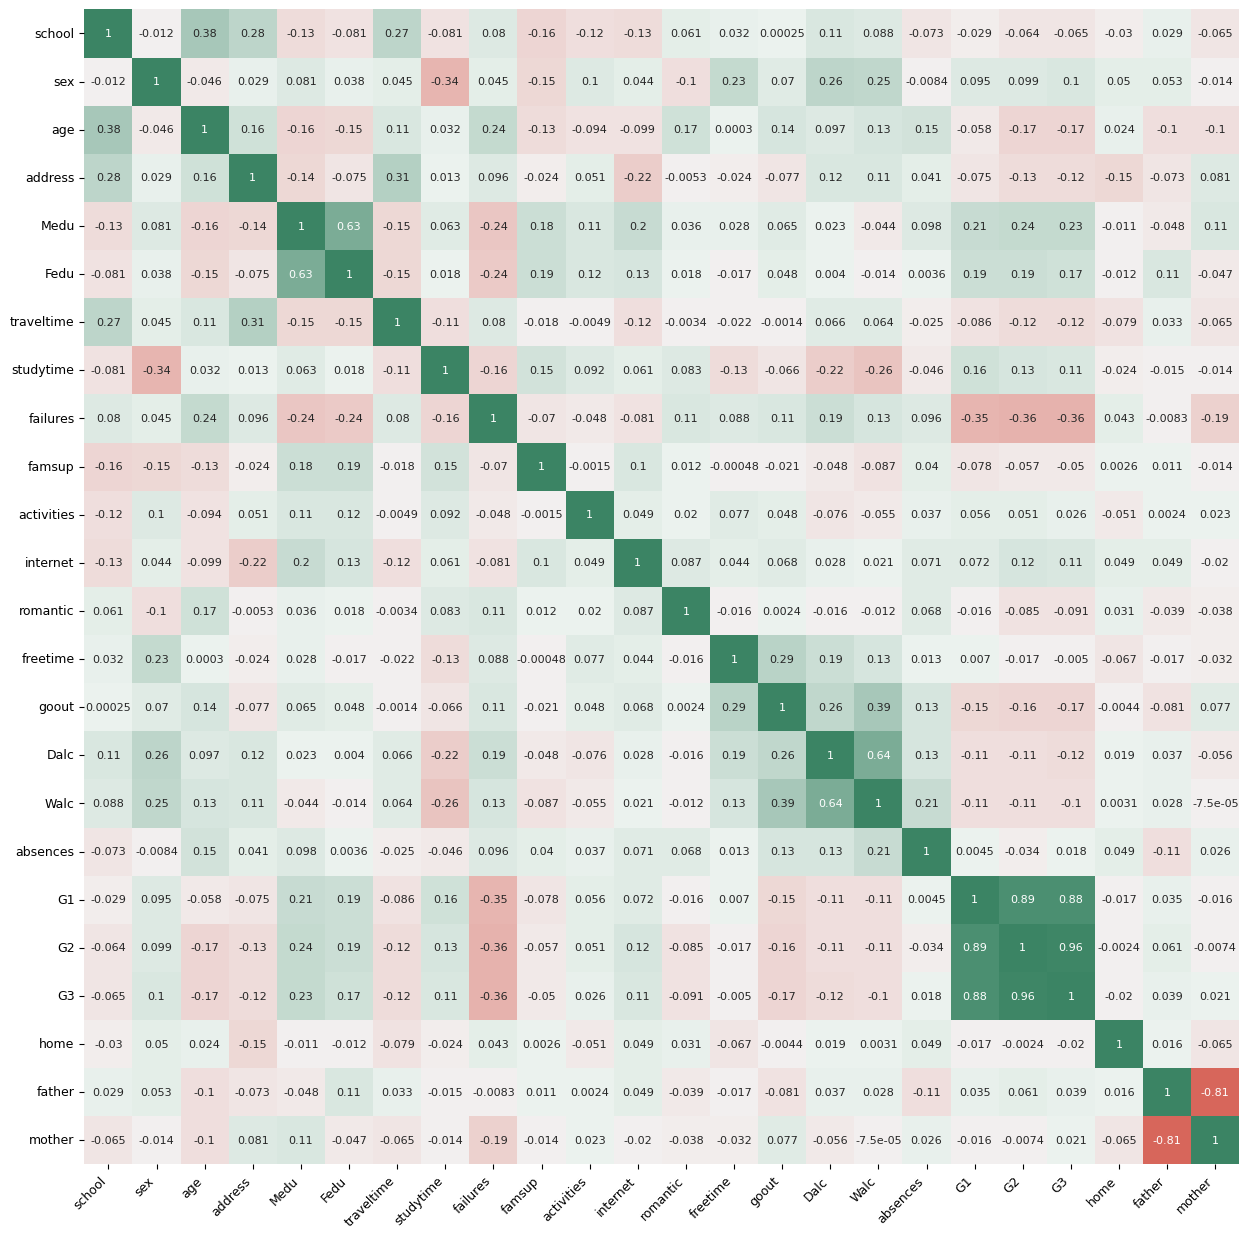

In [54]:
### Grafica de la correlación
fig, ax = plt.subplots(1,1, figsize=(15,15))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size":8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(15,150,n=100),
    square=True,
    ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.tick_params(labelsize=9)

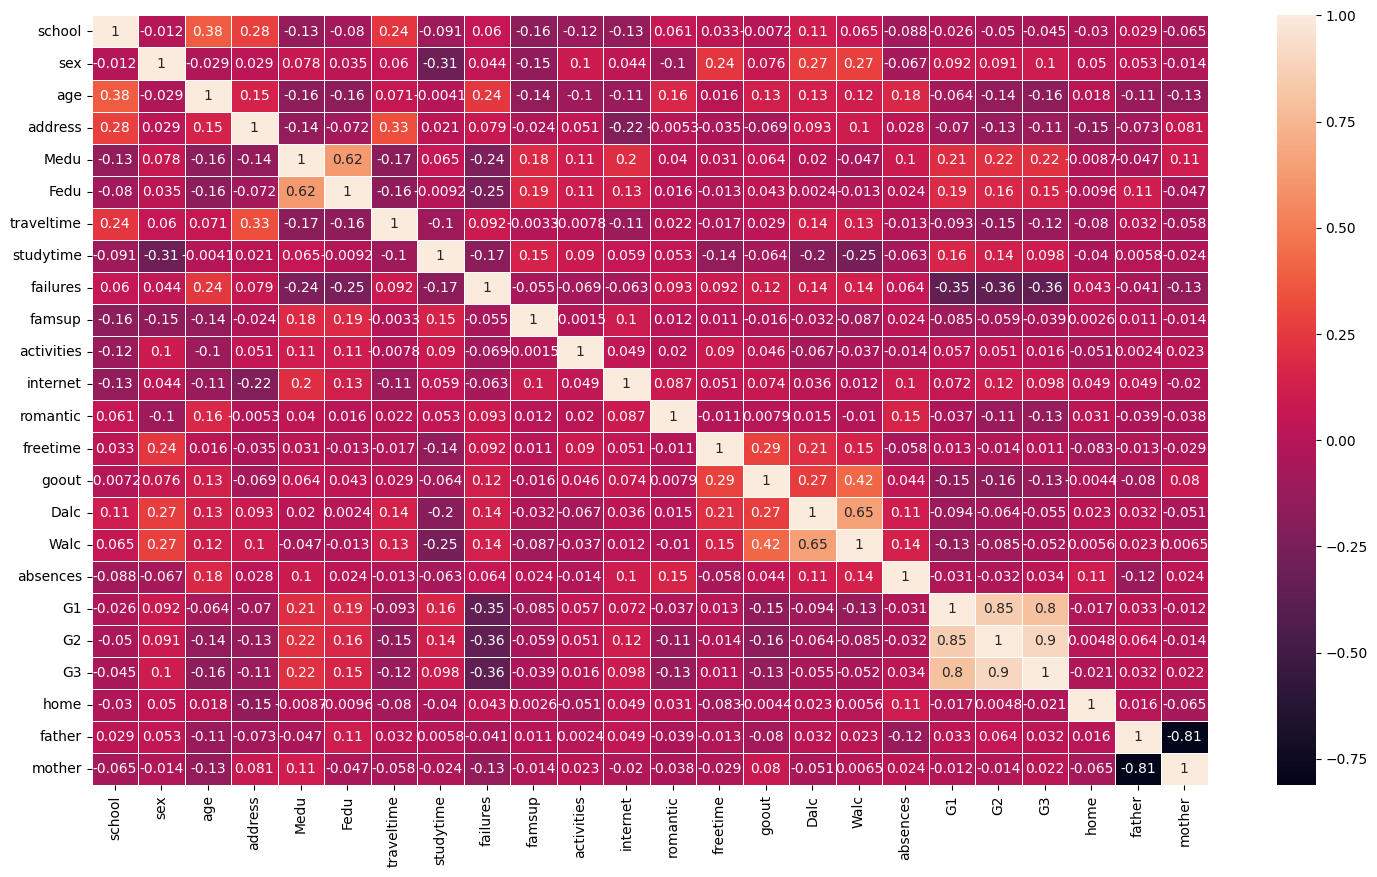

In [55]:
DiagCorr(dataNormalizada, 18, 10)

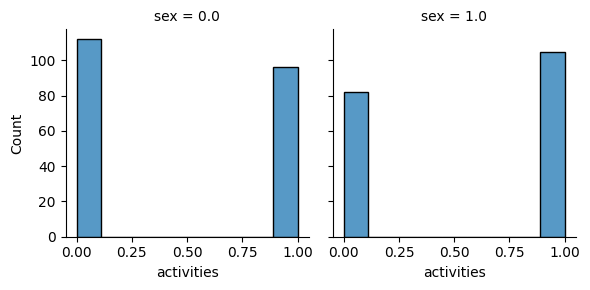

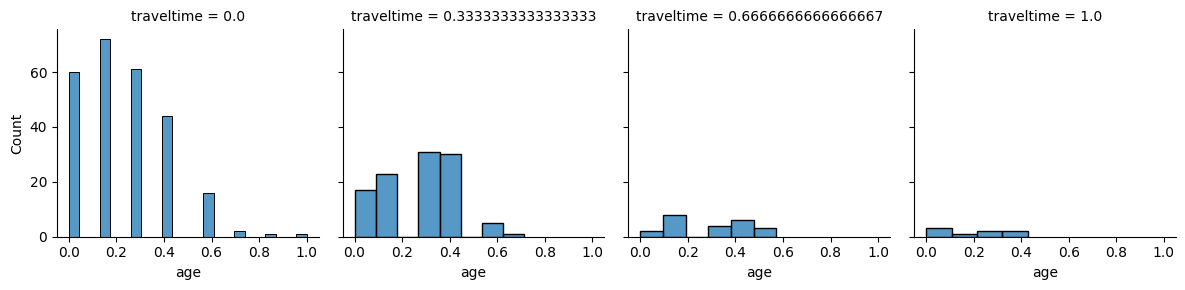

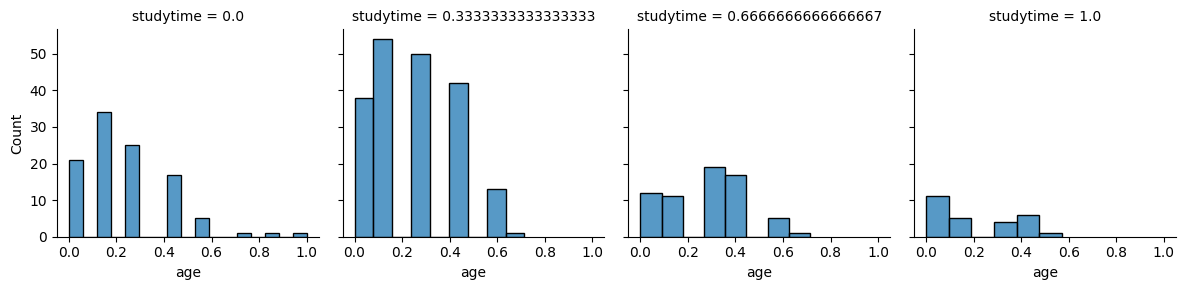

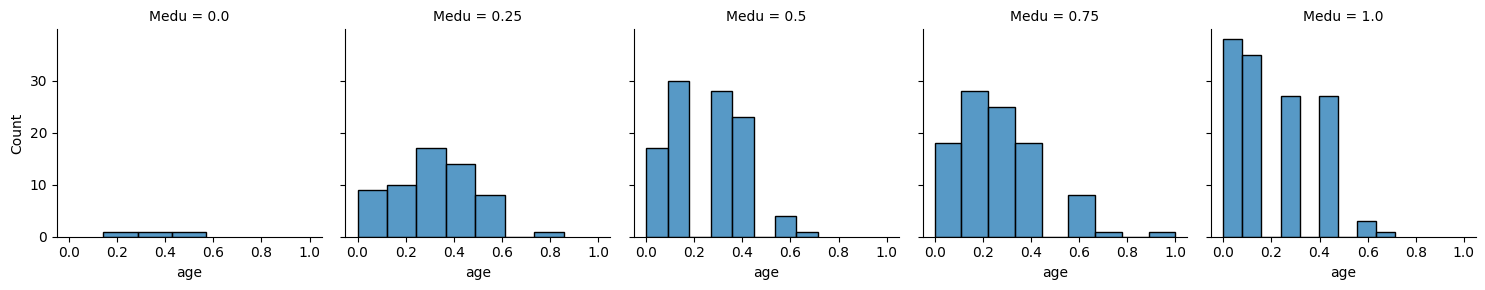

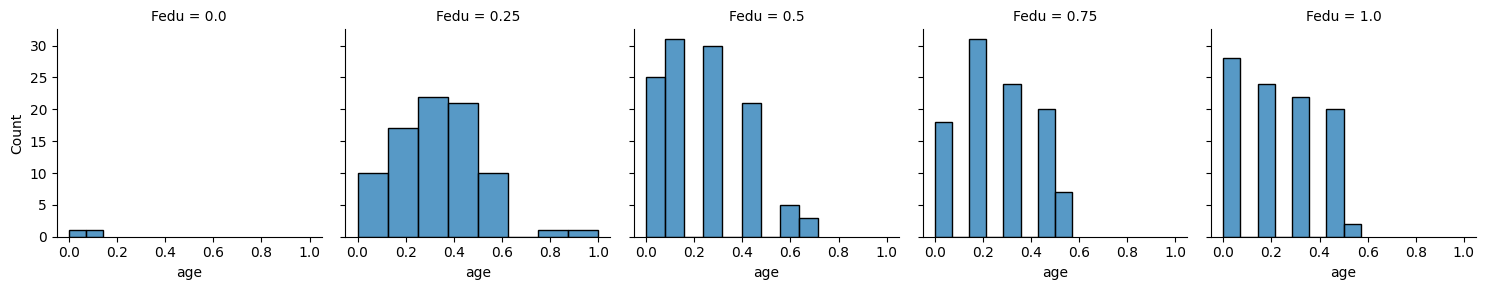

In [56]:
### Graficas
multigraf(dataNormalizada, 'sex', 'activities')
multigraf(dataNormalizada, 'traveltime', 'age')
multigraf(dataNormalizada, 'studytime', 'age')
multigraf(dataNormalizada, 'Medu', 'age')
multigraf(dataNormalizada, 'Fedu', 'age')

In [57]:
### Regresión logística iterando el porcentaje de entrenamiento
### Definir el valor X y Y
dataNormAux = dataNormalizada
x = dataNormAux.drop(['G3'], axis=1)
y = dataNormAux['G3']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Sacar los 4 grupos(2 train y 2 testeo)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.90, random_state=42)

### Entrenar el modelo
ml = LinearRegression()
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
round(r2_score(y_test, y_pred), 3)*100

### Con base en las variables independientes (x1,x2,3) la predicción de G3 llego a un valor de eficiencia del 70.8% ajustando a 90% de datos de entrenamiento y un 10% de testeo sobre los datos.

70.89999999999999

In [58]:
### Metricas
rmse = mean_squared_error(y_test, y_pred)
round(rmse, 6)

0.017968

In [59]:
### Entrenar el modelo
mldos = LinearRegression()
mldos.fit(x_test, y_test)
y_preddos = mldos.predict(x_test)
round(r2_score(y_test, y_preddos), 3)*100

84.8

In [60]:
### Metricas
rmsedos = mean_squared_error(y_test, y_preddos)
round(rmsedos, 6)

### Modelo con datos train = eficiencia de 70.8%
### RMSE = 0.017968

### Modelo dos con datos test = eficiencia del 84.8%
### RMSE = 0.009391

0.009391

/var/folders/p9/y_43j0r53_j9skhcs0qd_fc0s7s8hf/T/ipykernel_98842/1883084539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores actuales')
/var/folders/p9/y_43j0r53_j9skhcs0qd_fc0s7s8hf/T/ipykernel_98842/1883084539.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Axes: xlabel='G3', ylabel='Density'>

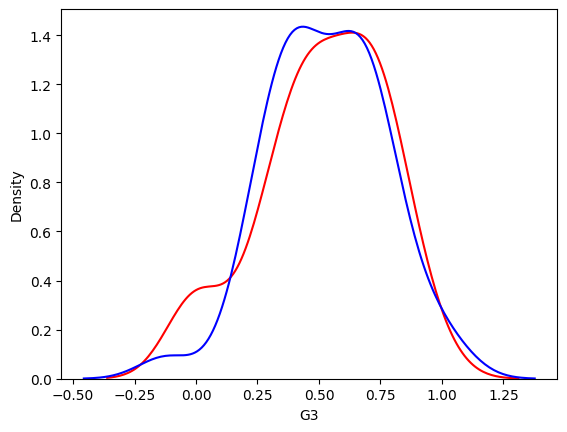

In [61]:
### Grafica del modelo
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores actuales')
sns.distplot(y_pred, hist=False, color='b', label='Valores predecidos')

/var/folders/p9/y_43j0r53_j9skhcs0qd_fc0s7s8hf/T/ipykernel_98842/3062242534.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores actuales')
/var/folders/p9/y_43j0r53_j9skhcs0qd_fc0s7s8hf/T/ipykernel_98842/3062242534.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Axes: xlabel='G3', ylabel='Density'>

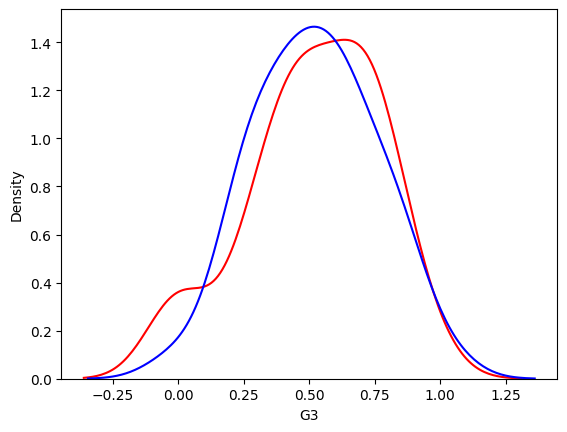

In [62]:
### Grafica del modelo
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores actuales')
sns.distplot(y_preddos, hist=False, color='b', label='Valores predecidos')

In [63]:
### Moldelo OLS
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
mlTres = sm.OLS(y_train, x_train_sm).fit()
mlTres.params

#G3 = -0.059675*x_test+

const        -0.059675
school        0.016613
sex           0.016806
age          -0.058685
address      -0.004625
Medu          0.024573
Fedu         -0.029240
traveltime    0.026307
studytime     0.008250
failures     -0.045624
famsup        0.010514
activities   -0.018649
internet     -0.013990
romantic     -0.025394
freetime      0.016762
goout         0.014516
Dalc         -0.029942
Walc          0.016563
absences      0.201427
G1            0.131580
G2            0.915826
home         -0.023947
father       -0.003665
mother        0.002278
dtype: float64

In [64]:
print(mlTres.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     83.37
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          8.90e-123
Time:                        14:12:52   Log-Likelihood:                 363.59
No. Observations:                 355   AIC:                            -679.2
Df Residuals:                     331   BIC:                            -586.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0597      0.037     -1.604      0.1

Se ejecutó el modelo con las variables númericas seleccionadas con el objetivo de predecir las nota de G3, las correlaciones de spearman entre notras fue superior a 0.9 en conjunto con el consumo de alcohol diario.

En cuanto a la creación de los modelos no existe overfitting o underfitting ya que el valor de la eficiencia esta para train 0.70 y para un test de 0.84 y unos valores RMSE 0.017968 y 0.009391 respectivamente.

Lo cual afirma que de 100 datos 84 pueden ser predecidos correctamente con base a las variables seleccionadas.